## Handling Missing Data

In [1]:
import numpy as np
import pandas as pd

pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [2]:
data = pd.Series([1, np.nan, 'hello', None])
data.dropna()

0        1
2    hello
dtype: object

In [3]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [4]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [5]:
data.fillna(data.mean())

a    1.0
b    2.0
c    2.0
d    2.0
e    3.0
dtype: float64

## Normalization

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'x': np.random.normal(-5, 3, 10000) # mean = -5 , standard deviation = 3
})

df.plot.kde()
plt.show()

print('Mean: ' + str(np.mean(df['x'])))
print('Standard deviation:')
print(np.sqrt(np.sum((df['x']-np.mean(df['x'])) ** 2)/(len(df['x'])-1)))
print(np.sqrt(np.sum((df['x']-np.mean(df['x'])) ** 2)/(len(df['x']))))
print(np.std(df['x']))

<Figure size 640x480 with 1 Axes>

Mean: -5.020378030178669
Standard deviation:
2.965781320684271
2.9656330279108247
2.9656330279108247


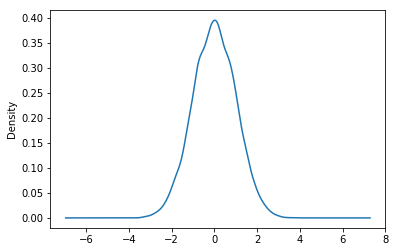

Mean: -1.474376176702208e-16
Mean: 1.0


In [7]:
y = df['x']
y = y - np.mean(y)
y = y / np.sqrt(np.sum(y**2) / len(y))

y.plot.kde()
plt.show()

print('Mean: ' + str(np.mean(y)))
print('Mean: ' + str(np.std(y)))


## StandardScaler

### <font color=green> $$ \frac{x_i - mean(x)}{ stdev(x)} $$ </font>

returns numpy ndarray!



In [8]:
z = df['x']
print(type(z))
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
zz = standardscaler.fit_transform(z.values.reshape(-1,1))
type(zz)

<class 'pandas.core.series.Series'>


numpy.ndarray

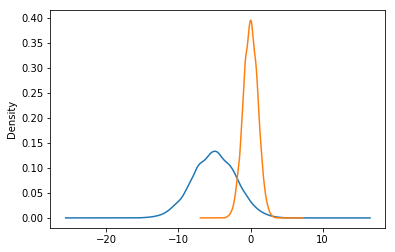

Mean: -1.474376176702208e-16
Mean: 1.0


In [11]:
z = pd.DataFrame(z, columns=['x'])
z = z['x']
zz = pd.DataFrame(zz, columns=['x'])
zz = zz['x']
z.plot.kde()
zz.plot.kde()
plt.show()

print('Mean: ' + str(np.mean(zz)))
print('Mean: ' + str(np.std(zz)))

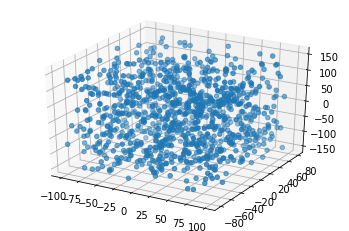

In [13]:
from mpl_toolkits.mplot3d import Axes3D
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

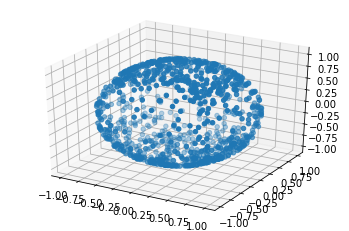

In [14]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)


## Encoding Categorical Values

In [19]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Medium','High','Low','High','High','Low']})
df.head()

,Age,Income
0,33,Medium
1,44,High
2,22,Low
3,44,High
4,55,High


In [20]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    2
1    3
2    1
3    3
4    3
5    1
Name: Income, dtype: int64

In [21]:
pd.get_dummies(df, drop_first=False)

,Age,Income_High,Income_Low,Income_Medium
0,33,0,0,1
1,44,1,0,0
2,22,0,1,0
3,44,1,0,0
4,55,1,0,0
5,22,0,1,0


## Imputation

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

df

,A,B
0,1.0,3.0
1,2.0,4.0
2,3.0,1.0
3,4.0,NaN
4,NaN,4.0
5,7.0,5.0


In [23]:
df = imputer.fit_transform(df)
df

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 1. ],
       [4. , 3.4],
       [3.4, 4. ],
       [7. , 5. ]])